In [31]:
import math
import copy
class Matrix:
    def __init__(self, row, col):
        self.row = row
        self.col = col
        self.data = [ 0 for i in range(row * col)]
        self.error = False

    def ResetMatrix(self, row, col):
        self.row = row
        self.col = col
        self.error = False

    def InitializeWithIdentity(self):
        for row in range(self.row):
            for col in range(self.col):
                if row == col:
                    self.data[row * self.col + col] = 1
                else:
                    self.data[row * self.col + col] = 0
    
    def CheckScalar(self, other):
        scalar = False
        if type(other) is float or type(other) is int:
            scalar = True
        return(scalar)

    def Add(self, other):
        scalar = self.CheckScalar(other)
        ans = Matrix(self.row, self.col)
        
        if scalar==False:
            if self.row != other.row or self.col != other.col:
                ans.error = True
                return(ans)
        
            for row in range(self.row):
                for col in range(self.col):
                    ans[row, col] = self[row, col] + other[row, col]
                    
        else:
            for row in range(self.row):
                for col in range(self.col):
                    ans[row, col] = self[ row, col] + other
        return(ans)

    def __add__(self, other):
        return(self.Add(other))


    def Sub(self, other):
        scalar = self.CheckScalar(other)
        ans = Matrix(self.row, self.col)
            
        if scalar==False:
            if self.row != other.row or self.col != other.col:
                ans.error = True
                return(ans)
        
            for row in range(self.row):
                for col in range(self.col):
                    ans[row, col] = self[row,col] - other[row, col]
        else:
            for row in range(self.row):
                for col in range(self.col):
                    ans[row, col] = self[row,col] - other
        return(ans)
    
    def __sub__(self, other):
        return(self.Sub(other))

    def __mul__(self, other):
        scalar = self.CheckScalar(other)
        
        if scalar == False and self.col != other.row:
            ans.error = True
            return(ans)

        if scalar==False:
            ans = Matrix(self.row, other.col)
            for row in range(self.row):
                for col in range(other.col):
                    for other_row in range(other.row):
                        ans[row,col] += self[row,other_row] * other[other_row,col]
        else:
            ans = Matrix(self.row, self.col)
            for row in range(self.row):
                for col in range(self.col):
                    ans[row, col] = self[row,col] * other

        return(ans)

    def __str__(self):
        if self.error == True:
            return("No Matrix")

        s = ""
        for row in range(self.row):
            s += "|"
            for col in range(self.col):
                s += "\t" + "{:.3f}".format(self[row,col])
            s += "\t|\n"
        return(s)

    def __setitem__(self, key, value):
        if len(key) == 2:
            row = key[0]
            col = key[1]
        elif len(key) == 1:
            row = 0
            col = key[0]
        else:
            return(None)
        if row>=self.row or row < 0 or col >= self.col or col < 0:
            return(None)
        
        self.data[ row * self.col + col ] = value
        

    def __getitem__(self, key):
        if len(key) == 2:
            row = key[0]
            col = key[1]
        elif len(key) == 1:
            row = 0
            col = key[0]
        else:
            return(None)
        if row>=self.row or row < 0 or col >= self.col or col < 0:
            return(None)

        #print("row:",row," col:",col)
        return(self.data[ row * self.col + col])

    def Inverse(self, inv_type="GaussJordan"):
        
        if inv_type == "GaussJordan":
              return(self.GaussJordanInverse())


    def GaussJordanInverse(self):
        det     = self.Det()
        ans     = Matrix(self.row, self.col)
        temp    = copy.deepcopy(self)
        ans.InitializeWithIdentity()
        #if self.row != self.col or det == 0:
        #    ans.error = False
        #    return(ans)
        print(self)
        for i in range(self.row):
            buf = 1.0 / temp[i,i]
            for j in range(self.row):
                temp[i,j] = temp[i,j] * buf
                ans[i,j] = ans[i,j] * buf
        
            for j in range(self.row):
                if i != j:
                    buf = temp[j,i]
                    for k in range(self.row):
                        temp[j,k] = temp[j,k] - temp[i,k] * buf
                        ans[j,k] = ans[j,k] - ans[i,k] * buf

        #self = copy.deepcopy(temp)

        return(ans) 

    def Det(self):
        temp = copy.deepcopy(self)
        det = 1.0
        for i in range(self.row):
            if self[i,i] == 0:
                for j in range(i,self.row):
                    for k in range(self.row):
                        buf = self[i,k]
                        temp[i,k] = temp[j,k]
                        temp[j,k] = buf
                    det *= -1.0
                    break   


        for i in range(self.row):
            for j in range(self.row):
                if i < j:
                    buf = temp[i,j] / temp[i,i]
                    for k in range(temp.row):
                        temp[j,k] = temp[j,k] - temp[i,k] * buf

        for i in range(temp.row):
            det *= temp[i,i]
        #self = copy.deepcopy(temp)
        return(det)
    

In [32]:
import numpy as np


In [33]:
Rx = Matrix(3,3)
Ry = Matrix(3,3)
Rz = Matrix(3,3)

In [34]:

def SetRxMat( R, roll):
    R[0,0] = 1.0
    R[0,1] = 0.0
    R[0,2] = 0.0
    R[1,0] = 0.0
    R[1,1] = np.cos(roll)
    R[1,2] = - np.sin(roll)
    R[2,0] = 0.0
    R[2,1] = np.sin(roll)
    R[2,2] = np.cos(roll)

def SetRyMat( R, pitch):
    R[0,0] = np.cos(pitch)
    R[0,1] = 0.0
    R[0,2] = np.sin(pitch)
    R[1,0] = 0.0
    R[1,1] = 1.0
    R[1,2] = 0.0
    R[2,0] = -np.sin(pitch)
    R[2,1] = 0.0
    R[2,2] = np.cos(pitch)

def SetRzMat( R, yaw):
    R[0,0] = np.cos(yaw)
    R[0,1] = -np.sin(yaw)
    R[0,2] = 0.0
    R[1,0] = np.sin(yaw)
    R[1,1] = np.cos(yaw)
    R[1,2] = 0.0
    R[2,0] = 0.0
    R[2,1] = 0.0
    R[2,2] = 1.0  

In [35]:
roll = 90.0
pitch = 0.0
yaw = 0.0
deg2rad = np.pi / 180.0
roll *= deg2rad
pitch *= deg2rad
yaw *= deg2rad 
print(yaw)

0.0


In [36]:
SetRxMat(Rx, roll)
SetRyMat(Ry, pitch)
SetRzMat(Rz, yaw)

In [37]:
state = Matrix(3,1)
state[0,0] = 1
state[1,0] = 0
state[2,0] = 1

In [38]:
new_state = Rz * Rx * Ry * state

In [39]:
print(state)

|	1.000	|
|	0.000	|
|	1.000	|



In [40]:
print(new_state)

|	1.000	|
|	-1.000	|
|	0.000	|



In [41]:
print("Rx=\n",Rx)
print("Ry=\n",Ry)
print("Rz=\n",Rz)

Rx=
 |	1.000	0.000	0.000	|
|	0.000	0.000	-1.000	|
|	0.000	1.000	0.000	|

Ry=
 |	1.000	0.000	0.000	|
|	0.000	1.000	0.000	|
|	-0.000	0.000	1.000	|

Rz=
 |	1.000	-0.000	0.000	|
|	0.000	1.000	0.000	|
|	0.000	0.000	1.000	|



|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



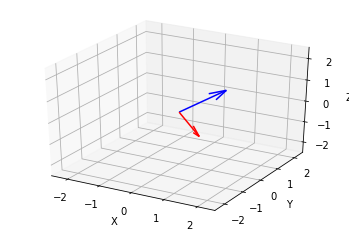

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

O = Matrix(3,1)
O[0,0] = 0
O[1,0] = 0
O[2,0] = 0

length = np.sqrt(np.power(state[0,0] - O[0,0], 2) + np.power(state[1,0] - O[1,0], 2) + np.power(state[2,0] - O[2,0],2))
ax.quiver(O[0,0], O[1,0], O[2,0], state[0,0], state[1,0], state[2,0], length=length, color="blue")
ax.quiver(O[0,0], O[1,0], O[2,0], new_state[0,0], new_state[1,0], new_state[2,0], length=length, color="red")
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-(length+1),length+1)
ax.set_ylim(-(length+1),length+1)
ax.set_zlim(-(length+1),length+1)
plt.show()

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'X-Y plot')

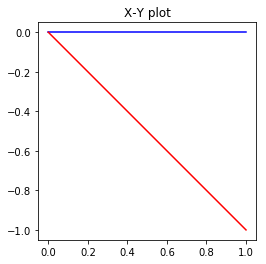

In [43]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")
print(new_state)
ax.plot(x,y,color="blue")
ax.plot(new_x,new_y,color="red")
ax.set_title("X-Y plot")

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'X-Z plot')

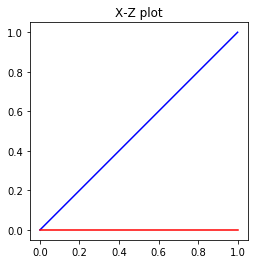

In [44]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.plot(x,z,color="blue")
ax.plot(new_x,new_z,color="red")
ax.set_title("X-Z plot")

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'Y-Z plot')

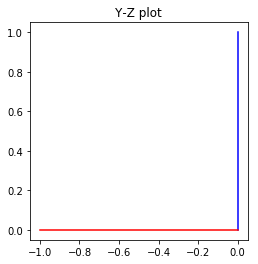

In [45]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.plot(y,z,color="blue")
ax.plot(new_y,new_z,color="red")
ax.set_title("Y-Z plot")